# Grid Search

## Simple Grid Search
Using loop to find the best parameters of the model

In [19]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Training set size {} Test set size {}".format(X_train.shape, X_test.shape))


best_score = 0
best_parameters = {}

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # create a model for each combination
        svc = SVC(C=C, gamma=gamma, random_state=0)
        svc.fit(X_train, y_train)

        # evaluate using the test set
        score = svc.score(X_test, y_test)

        # save the best score
        if best_score < score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# print the results
print("Best Score %.3f" % best_score)
print("Best Parameters {}".format(best_parameters))

Training set size (112, 4) Test set size (38, 4)
Best Score 0.974
Best Parameters {'C': 100, 'gamma': 0.001}


In [33]:
# however the best score is made by splitting our data into train and test
# the test data is somewhat belongs to train data. At the real world the data
# is tested by using an entirely new data. Therefore we need and independent
# data to validate our model
# one way to do this is by splitting our dataset again
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0
) 
X_train, X_valid, y_train, y_valid= train_test_split(
    X_trainval, y_trainval, random_state=1
)

print("Training set size {} Validation set size {}".format(X_train.shape, X_valid.shape))
print("Test set size {}".format(X_test.shape))


best_score = 0
best_parameters = {}

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # create a model for each combination
        svc = SVC(C=C, gamma=gamma, random_state=0)
        svc.fit(X_train, y_train)

        # validate the model using validation
        # set
        score = svc.score(X_valid, y_valid)

        # save the best score
        if best_score < score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


# test model using the best parameter
# and test dataset
svc_test = SVC(**best_parameters)
svc_test.fit(X_trainval, y_trainval)
score = svc_test.score(X_test, y_test)

# print the results
# our test score is what our model
# performance really
print("Validation best score %.2f" % best_score)
print("Test Score %.2f" % score)
print("Best Parameters {}".format(best_parameters))

Training set size (84, 4) Validation set size (28, 4)
Test set size (38, 4)
Validation best score 0.96
Best Score 0.92
Best Parameters {'C': 10, 'gamma': 0.001}


## Grid Search with Cross Validation

In [34]:
# Previous method depends on how the train data
# is splitted, we can use Cross validation to help
# our data splitted and validate the model
from sklearn.model_selection import cross_val_score

best_score = 0
best_parameters = {}

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # create a model for each combination
        svc = SVC(C=C, gamma=gamma, random_state=0)

        # perform cross validation
        scores = cross_val_score(svc, X_trainval, y_trainval, cv=5)
        # compute the mean score
        score = scores.mean()

        # save the best score
        if best_score < score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


# test model using the best parameter
# and test dataset
svc_test = SVC(**best_parameters)
svc_test.fit(X_trainval, y_trainval)
score = svc_test.score(X_test, y_test)

# print the results
# our test score is what our model
# performance really
print("Validation best score %.2f" % best_score)
print("Test Score %.2f" % score)
print("Best Parameters {}".format(best_parameters))

Validation best score 0.97
Test Score 0.97
Best Parameters {'C': 10, 'gamma': 0.1}


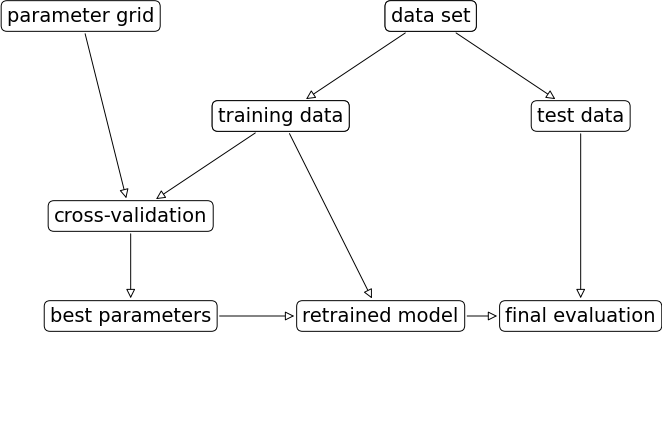

In [36]:
import mglearn
mglearn.plots.plot_grid_search_overview()

In [43]:
# implementing grid search using Scikit-learn
from sklearn.model_selection import GridSearchCV

# create our param_grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid ", param_grid)

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# split our train and test
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)

# grid search have methods like the models
# fit() predict() score()
grid_search.fit(X_train, y_train)

# evaluate how the grid_search performs
print("Grid search best score {:.2f}".format(grid_search.score(X_test, y_test)))
# print the best params
print("Best params {}".format(grid_search.best_params_))
# accessing the best model params
print("Best models estimators\n{}".format(grid_search.best_estimator_))

Parameter grid  {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Grid search best score 0.97
Best params {'C': 10, 'gamma': 0.1}
Best models estimators
SVC(C=10, gamma=0.1)


### Analyzing the cross validation results

the grid search have cv_results_ attributes that holds the search aspect of finding the best model

In [46]:
import pandas as pd
# the cv_results attribute is a numpy dictionary
# which could be imported into pandas Dataframe
results = pd.DataFrame(grid_search.cv_results_)
print(results.shape)
display(results.head())

(36, 15)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004003,0.000903,0.001597,0.000488,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.003394,0.000491,0.001399,0.000799,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.002401,0.000489,0.001201,0.000398,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.002401,0.000484,0.000801,0.000401,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.002399,0.000487,0.000399,0.000489,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


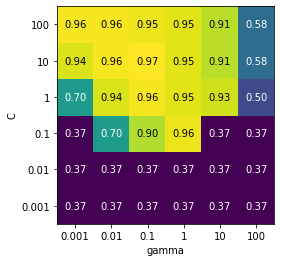

In [48]:
# visualizing the mean score time
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean using heatmap
mglearn.tools.heatmap(scores, xlabel="gamma", xticklabels=param_grid['gamma'],
                      ylabel= 'C', yticklabels=param_grid['C'], cmap='viridis')

### Searching the spaces that are not grids

For some cases line in linear model, if we use RBF there is gamma param, but if using linear then no gamma param.

In [51]:
param_grid = [{'kernel': ['rbf'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids :\n {}".format(param_grid))

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

List of grids :
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


### Nested cross validation

Instead of splitting the test and train set once, we could do it many times using cross validation. The idea is to make our model not to rely on the single splitted data.

However this method is not for finding the model that would be used to apply future data, but to evaluate the model performance on a particular dataset.

In [53]:
param_grid = [{'kernel': ['rbf'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids :\n {}".format(param_grid))

scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)

print("Cross validation scores: {}".format(scores))
print("Mean cross validation scores: {}".format(scores.mean()))

List of grids :
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
Cross validation scores: [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross validation scores: 0.9666666666666668


In [57]:
# implementing the nested cross validation in the hard way
from sklearn.model_selection import ParameterGrid, StratifiedKFold

def nested_cv(X, y, innercv, outercv, Classifier, parameter_grid):
    outer_scores = [] # list of scores
    # splitting training and test data using outercv
    for training_samples, test_samples in outercv.split(X, y):
        # find the best parameter using inner cross-validation
        best_params = {}
        best_score = []

        # iterate over parameters
        for params in parameter_grid:
            cv_scores = [] # accumulate inner scores

            # iterate over inner cross validation
            for inner_train, inner_test in outercv.split(
                    X[training_samples], y[training_samples]
                ):
                    # build classifer with inner data
                    classifier = Classifier(**params)
                    classifier.fit(X[inner_train], y[inner_train])

                    # calculate the score
                    score = classifier.score(X[inner_test], y[inner_test])
                    # append the score
                    cv_scores.append(score)
            # compute the mean over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better then update the parameter
                best_params = params
                best_score = mean_score

        # build classifier using outer traing dataset
        classifier = Classifier(**best_params)
        classifier.fit(X[training_samples], y[training_samples])
        # evaluate classifier
        outer_scores.append(classifier.score(X[test_samples], y[test_samples]))
    # return scores
    return np.array(outer_scores)


scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5),
            SVC, ParameterGrid(param_grid))
print("Nested Cross validation scores {}".format(scores))


Nested Cross validation scores [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]


In [ ]:
You can defined the number of n_jobs param in GridSearchCV or cross_val_score to enable parallelism.

But remember, the scikit-learn does not allow nested parallelism